<a href="https://colab.research.google.com/github/Lichannn/sentiment_analysis/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###**Sentiment Analysis berdasarkan tweet di Twitter**





Install vaderSentiment

In [ ]:
pip install vaderSentiment

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Import semua library yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from textblob import TextBlob

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import Data Ganjar dari Google Drive

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PKM PREPROCESSING - LABEL/Data/dataset_twitter-scraper_ganjar.csv')
df = pd.DataFrame(data[["conversation_id", "created_at", "favorite_count", "full_text"]])
df

<ipython-input-226-60a53111ba0b>:1: DtypeWarning: Columns (11,12,13,14,15,16,17,18,19,20,21,26,27,28,29,30,31,38,39,40,41,42,43,44,45,46,47,50,51,52,53,54,55,56,57,59,62,63,64,65,66,67,79,106,112,120,125,126,128,129,131,132,134,135,137,138,140,141,143,144,146,147,149,150,152,153,159,170,171,172,173,174,175,245,246,248,249,251,252,254,255,257,258,260,261,263,264,266,267,269,270,272,273,275,276,278,279,281,282,284,285,287,288,290,291,293,294) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/PKM PREPROCESSING - LABEL/Data/dataset_twitter-scraper_ganjar.csv')


,conversation_id,created_at,favorite_count,full_text
0,1636652297521451011,2023-03-17T09:18:52.000Z,0,@erikboderek @apify This is personal because i...
1,1636652297521451011,2023-03-17T09:16:10.000Z,0,@tehseowner @apify product launch incoming or ...
2,1636652297521451011,2023-03-17T09:13:10.000Z,1,"All of the headings, META titles for the revie..."
3,1636351859915980801,2023-03-16T13:01:00.000Z,1,To scrape a website with a structure as convol...
4,1636152267161366529,2023-03-15T23:47:53.000Z,1,Day 44 of #100DaysOfNoCode\n\nI started @NoCod...
...,...,...,...,...
4797,22429354322,2010-08-29T10:56:04.000Z,0,apify (0.4.1): Compact definition of JSON APIs...
4798,22428721119,2010-08-29T10:42:04.000Z,0,apify (0.4.0): Compact definition of JSON APIs...
4799,22349334294,2010-08-28T12:30:04.000Z,0,apify (0.3.0): Compact definition of JSON APIs...
4800,12059603968,2010-04-12T18:33:49.000Z,0,@jottevanger Wonder if the Plink API will surv...


Preprocessing Data Ganjar

In [ ]:
def remove_special_chars(full_text):
    # hapus hashtags
    full_text = re.sub(r'#\w+', '', full_text)
    # hapus mentions
    full_text = re.sub(r'@\w+', '', full_text)
    # hapus links
    full_text = re.sub(r'http\S+', '', full_text)
    # hapus emojis
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F" 
                                u"\U0001F300-\U0001F5FF" 
                                u"\U0001F680-\U0001F6FF" 
                                u"\U0001F1E0-\U0001F1FF"  
                                u"\U0001F600-\U0001F64F" 
                                u"\U0001F300-\U0001F5FF" 
                                u"\U0001F680-\U0001F6FF" 
                                u"\U0001F1E0-\U0001F1FF"  
                                u"\U00002500-\U00002BEF" 
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642" 
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f" 
                                u"\u3030"
                               "]+", flags=re.UNICODE)
    full_text = emoji_pattern.sub(r'', full_text)
    # hapus spasi berlebih
    full_text = re.sub(r'\s+', ' ', full_text).strip()
    return full_text
df['full_text'] = df['full_text'].apply(remove_special_chars)

In [ ]:
df

,conversation_id,created_at,favorite_count,full_text
0,1636652297521451011,2023-03-17T09:18:52.000Z,0,This is personal because it's designed to work...
1,1636652297521451011,2023-03-17T09:16:10.000Z,0,product launch incoming or this personal only?
2,1636652297521451011,2023-03-17T09:13:10.000Z,1,"All of the headings, META titles for the revie..."
3,1636351859915980801,2023-03-16T13:01:00.000Z,1,To scrape a website with a structure as convol...
4,1636152267161366529,2023-03-15T23:47:53.000Z,1,Day 44 of I started 's learning path on web sc...
...,...,...,...,...
4797,22429354322,2010-08-29T10:56:04.000Z,0,apify (0.4.1): Compact definition of JSON APIs...
4798,22428721119,2010-08-29T10:42:04.000Z,0,apify (0.4.0): Compact definition of JSON APIs...
4799,22349334294,2010-08-28T12:30:04.000Z,0,apify (0.3.0): Compact definition of JSON APIs...
4800,12059603968,2010-04-12T18:33:49.000Z,0,Wonder if the Plink API will survive its integ...


**OPSIONAL LABELING**

In [ ]:
# from ast import If
# # menentukan tweet sentiment
# sia = SentimentIntensityAnalyzer()

# def label_sentiment_and_words(full_text):
#     # pelabel the compound sentiment score
#     sentiment_score = sia.polarity_scores(full_text)['compound']
#     # pelabel sentiment  positive, negative atay neutral berdasarkan compound sentiment score
#     sentiment_label = 'positive' if sentiment_score >= 0 else 'negative'
#     # pelabel number of words
#     num_words = len(TextBlob(full_text).words)
#     return pd.Series({'full_text': full_text, 'coumpound': sentiment_score, 'sentiment': sentiment_label, 'num_words': num_words})
# df3 = df2['full_text'].apply(label_sentiment_and_words)
# df3

LABELING Data Ganjar

In [ ]:
sid = SentimentIntensityAnalyzer()

# memasukan vader analisis ke dalam text, column, dan perhitungan sentiment scores
df[['neg', 'neu', 'pos', 'compound']] = df['full_text'].apply(lambda x: pd.Series(sid.polarity_scores(x)))

# Hapus karakter non-kata dan hitung jumlah kata di setiap string teks
df['num_words'] = df['full_text'].apply(lambda x: len(re.findall(r'\w+', x)))

# pelabelan sentiment positive, negative, atau neutral berdasarkan compound score
df.loc[df['compound'] > 0, 'sentiment'] = 'positive'
df.loc[df['compound'] < 0, 'sentiment'] = 'negative'
df.loc[df['compound'] == 0, 'sentiment'] = 'neutral'

df

,conversation_id,created_at,favorite_count,full_text,neg,neu,pos,compound,num_words,sentiment
0,1636652297521451011,2023-03-17T09:18:52.000Z,0,This is personal because it's designed to work...,0.086,0.914,0.000,-0.6310,48,negative
1,1636652297521451011,2023-03-17T09:16:10.000Z,0,product launch incoming or this personal only?,0.000,1.000,0.000,0.0000,7,neutral
2,1636652297521451011,2023-03-17T09:13:10.000Z,1,"All of the headings, META titles for the revie...",0.000,0.962,0.038,0.2023,49,positive
3,1636351859915980801,2023-03-16T13:01:00.000Z,1,To scrape a website with a structure as convol...,0.058,0.884,0.058,0.0000,42,neutral
4,1636152267161366529,2023-03-15T23:47:53.000Z,1,Day 44 of I started 's learning path on web sc...,0.000,0.865,0.135,0.5562,24,positive
...,...,...,...,...,...,...,...,...,...,...
4797,22429354322,2010-08-29T10:56:04.000Z,0,apify (0.4.1): Compact definition of JSON APIs...,0.000,1.000,0.000,0.0000,12,neutral
4798,22428721119,2010-08-29T10:42:04.000Z,0,apify (0.4.0): Compact definition of JSON APIs...,0.000,1.000,0.000,0.0000,12,neutral
4799,22349334294,2010-08-28T12:30:04.000Z,0,apify (0.3.0): Compact definition of JSON APIs...,0.000,1.000,0.000,0.0000,12,neutral
4800,12059603968,2010-04-12T18:33:49.000Z,0,Wonder if the Plink API will survive its integ...,0.000,1.000,0.000,0.0000,18,neutral


Menghitung sentiment positif, negatif, dan netral

In [ ]:
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['full_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# menghitung percentage positive, negative dan netral
positive_percent = (df['sentiment_score'] > 0).mean() * 100
negative_percent = (df['sentiment_score'] < 0).mean() * 100
neutral_percent = (df['sentiment_score'] == 0).mean() * 100

print(f"Positive sentiment: {positive_percent:.2f}%")
print(f"Negative sentiment: {negative_percent:.2f}%")
print(f"Neutral sentiment: {neutral_percent:.2f}%")

Positive sentiment: 36.36%
Negative sentiment: 4.66%
Neutral sentiment: 58.98%


In [ ]:
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['full_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# menghitung total positive, negative dan netral
positive_percent = (df['sentiment_score'] > 0).sum()
negative_percent = (df['sentiment_score'] < 0).sum()
neutral_percent = (df['sentiment_score'] == 0).sum()

print(f"Positive sentiment: {positive_percent:}")
print(f"Negative sentiment: {negative_percent:}")
print(f"Neutral sentiment: {neutral_percent:}")

Positive sentiment: 1746
Negative sentiment: 224
Neutral sentiment: 2832


Grafik dari sentence dan tweet sentence

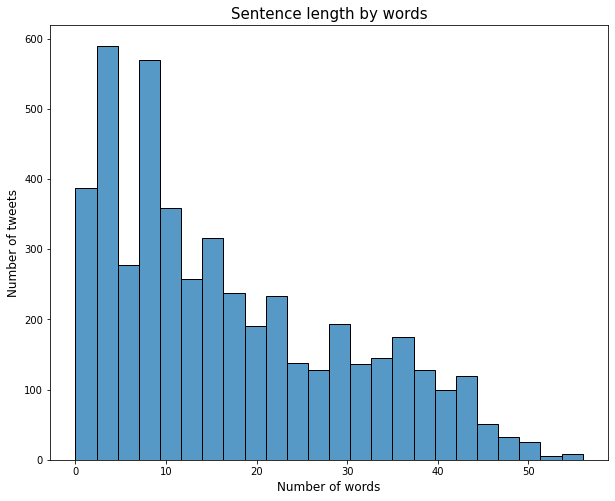

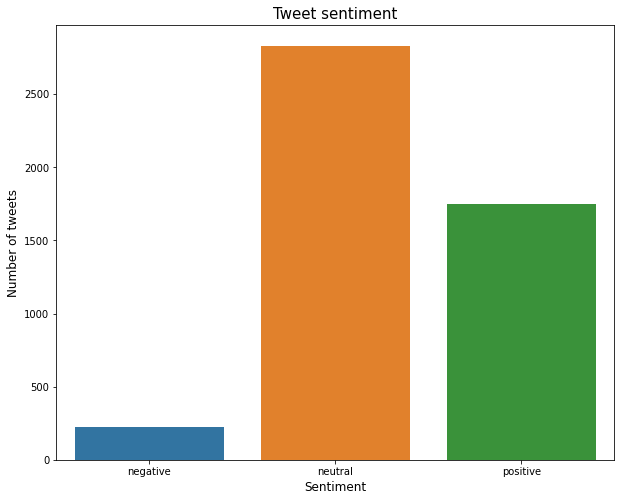

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['num_words'])
plt.title("Sentence length by words", fontsize=15)
plt.ylabel("Number of tweets", fontsize=12)
plt.xlabel("Number of words", fontsize=12)
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='sentiment')
plt.title("Tweet sentiment", fontsize=15)
plt.ylabel("Number of tweets", fontsize=12)
plt.xlabel("Sentiment", fontsize=12)
plt.show()
